# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from scipy import stats

# Metric libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Models
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("../archive/2019/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos contiene información sobre 5,960 prestamos realizados recientemente incluyendo información sobre el prestamo propiamente dicho y datos relacionados.

2. La variable objetivo a predecir es BAD, una variable binaria que indica si el prestamos es pagado o no.

3. Los atributos disponibles son:
        - LOAN: Monto del crédito solicitado.
        - MORTDUE: Importe adeudado por la hipoteca existente.
        - VALUE: Valor de la propiedad actual.
        - YOJ: Años en el trabajo actual.
        - DEROG: Número de informes derogatorios importantes.
        - DELINQ: Número de líneas de crédito morosas.
        - CLAGE: Edad de la línea comercial más antigua en meses.
        - NINQ: Número de líneas de crédito recientes.
        - CLNO: Número de líneas de crédito.
        - DEBTINC: Relación deuda-ingreso (en porcentaje).

4.Imagino que los mas relevantes son DEBTINC, CLAGE, DELINQ, DEROG, MORTDUE.


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [3]:
clf_model = SGDClassifier(random_state=1)
clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

In [4]:
print("Train Accuracy score")
y_pred = clf_model.predict(X_train)
# Accuracy score
print(accuracy_score(y_train, y_pred))

print("Test Accuracy score")
y_pred = clf_model.predict(X_test)
# Accuracy score
print(accuracy_score(y_test, y_pred))

Train Accuracy score
0.803776129467296
Test Accuracy score
0.8140161725067385


In [5]:
# La precision es la cantidad de positivos propuestos por el modelo que fueron correctos

print("Train precision score")
y_pred = clf_model.predict(X_train)
# Precision score
print(precision_score(y_train, y_pred))

print("Test precision score")
y_pred = clf_model.predict(X_test)
# Precision score
print(precision_score(y_test, y_pred))

Train precision score
0.14285714285714285
Test precision score
0.0


In [6]:
# La recall es la cantidad de positivos correctos que fueron encontrados por el modelo

print("Train Recall score")
y_pred = clf_model.predict(X_train)
# Recall score
print(recall_score(y_train, y_pred))

print("Test Recall score")
y_pred = clf_model.predict(X_test)
# Recall score
print(recall_score(y_test, y_pred))

Train Recall score
0.03187250996015936
Test Recall score
0.0


In [7]:
print("Train F1 score")
y_pred = clf_model.predict(X_train)
# F1 score
print(f1_score(y_train, y_pred))

print("Test F1 score")
y_pred = clf_model.predict(X_test)
# F1 score
print(f1_score(y_test, y_pred))

Train F1 score
0.052117263843648204
Test F1 score
0.0


In [8]:
print("Train confusion matrix")
y_pred = clf_model.predict(X_train)
# Confusion matrix
print(confusion_matrix(y_train, y_pred))

print("Test confusion matrix")
y_pred = clf_model.predict(X_test)
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Train confusion matrix
[[1184   48]
 [ 243    8]]
Test confusion matrix
[[302  11]
 [ 58   0]]


### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [9]:
clf_model = SGDClassifier(random_state=1)

param_grid = {
    'loss': [
        'hinge',        # SVM
        'log',          # logistic regression
    ],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate' : [
        'constant', # eta = eta0
        'optimal', # eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou
        'invscaling', # eta = eta0 / pow(t, power_t)
        'adaptive', # eta = eta0, as long as the training keeps decreasing...
    ],
    'eta0' : [0.0001, 0.001, 0.01, 0.1, 1],
}

# Param cv = None (default), to use the default 5-fold cross validation
cv = GridSearchCV(clf_model, param_grid, scoring='accuracy')
cv.fit(X_train, y_train);


results = cv.cv_results_
best_model = cv.best_estimator_
df = pd.DataFrame(results).sort_values('rank_test_score')
df[['param_alpha', 'param_learning_rate', 'param_eta0', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_alpha,param_learning_rate,param_eta0,mean_test_score,std_test_score,rank_test_score
84,0.01,invscaling,0.0001,0.831425,0.001965,1
87,0.01,adaptive,0.0001,0.831425,0.001965,1
166,1,adaptive,0.0001,0.831425,0.001965,1
20,0.0001,invscaling,0.01,0.831425,0.001965,1
127,0.1,adaptive,0.0001,0.831425,0.001965,1
...,...,...,...,...,...,...
94,0.01,adaptive,0.001,0.609851,0.253037,196
92,0.01,invscaling,0.001,0.593352,0.293259,197
28,0.0001,invscaling,0.1,0.592679,0.292707,198
60,0.001,invscaling,0.01,0.592679,0.292707,198


In [10]:
print("Train report")
y_pred = best_model.predict(X_train)
print(classification_report(y_train, y_pred))

print("Test report")
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Train report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1232
           1       0.25      0.01      0.02       251

    accuracy                           0.83      1483
   macro avg       0.54      0.50      0.46      1483
weighted avg       0.73      0.83      0.76      1483

Test report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



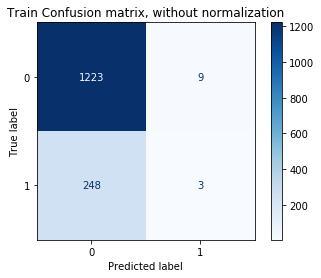

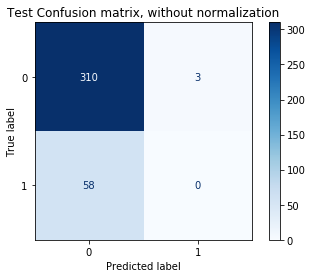

In [11]:
# The count of true negatives is C 0,0, false negatives is C 1,0,
# true positives is C 1,1 and false positives is C0,1.

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(best_model, X_train, y_train, cmap=plt.cm.Blues)
disp.ax_.set_title("Train Confusion matrix, without normalization")
plt.show()

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Test Confusion matrix, without normalization")
plt.show()


## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [12]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [13]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.88


In [14]:
print("Train report")
print(classification_report(y_train, y_train_pred))

print("Test report")
print(classification_report(y_test, y_test_pred))

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

Test report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



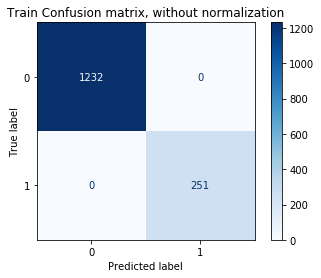

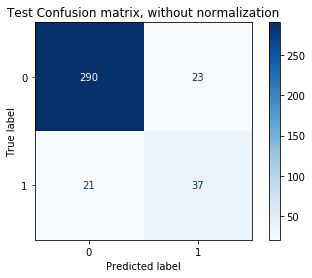

In [15]:
# The count of true negatives is C 0,0, false negatives is C 1,0,
# true positives is C 1,1 and false positives is C0,1.

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(clf, X_train, y_train, cmap=plt.cm.Blues)
disp.ax_.set_title("Train Confusion matrix, without normalization")
plt.show()

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Test Confusion matrix, without normalization")
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [16]:
clf_model = DecisionTreeClassifier(random_state=0)

param_grid = {
    'criterion': [
        'gini',
        'entropy',
    ],
    'max_depth': list(range(1,20)),
    'min_samples_leaf' : list(range(1,5)),
}

# Param cv = None (default), to use the default 5-fold cross validation
cv = GridSearchCV(clf_model, param_grid, scoring='accuracy')
cv.fit(X_train, y_train);


results = cv.cv_results_
best_model = cv.best_estimator_
df = pd.DataFrame(results).sort_values('rank_test_score')
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
37,gini,10,2,0.882678,0.021342,1
106,entropy,8,3,0.881991,0.011551,2
39,gini,10,4,0.881345,0.024713,3
32,gini,9,1,0.880665,0.022534,4
14,gini,4,3,0.879978,0.014675,5
...,...,...,...,...,...,...
151,entropy,19,4,0.857724,0.007746,145
66,gini,17,3,0.857053,0.029719,149
135,entropy,15,4,0.856377,0.006142,150
74,gini,19,3,0.855037,0.028699,151


In [17]:
best_model.fit(X_train, y_train)

# Predict
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [18]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.95
Test accuracy: 0.9


In [19]:
print("Train report")
print(classification_report(y_train, y_train_pred))

print("Test report")
print(classification_report(y_test, y_test_pred))

Train report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1232
           1       0.99      0.71      0.83       251

    accuracy                           0.95      1483
   macro avg       0.97      0.86      0.90      1483
weighted avg       0.95      0.95      0.95      1483

Test report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       313
           1       0.75      0.52      0.61        58

    accuracy                           0.90       371
   macro avg       0.83      0.74      0.78       371
weighted avg       0.89      0.90      0.89       371



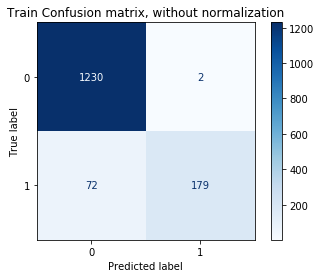

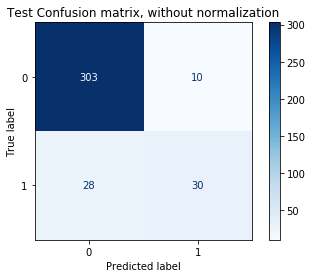

In [20]:
# The count of true negatives is C 0,0, false negatives is C 1,0,
# true positives is C 1,1 and false positives is C0,1.

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(best_model, X_train, y_train, cmap=plt.cm.Blues)
disp.ax_.set_title("Train Confusion matrix, without normalization")
plt.show()

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Test Confusion matrix, without normalization")
plt.show()

### Ejercicio 3.3: Inspección del Modelo

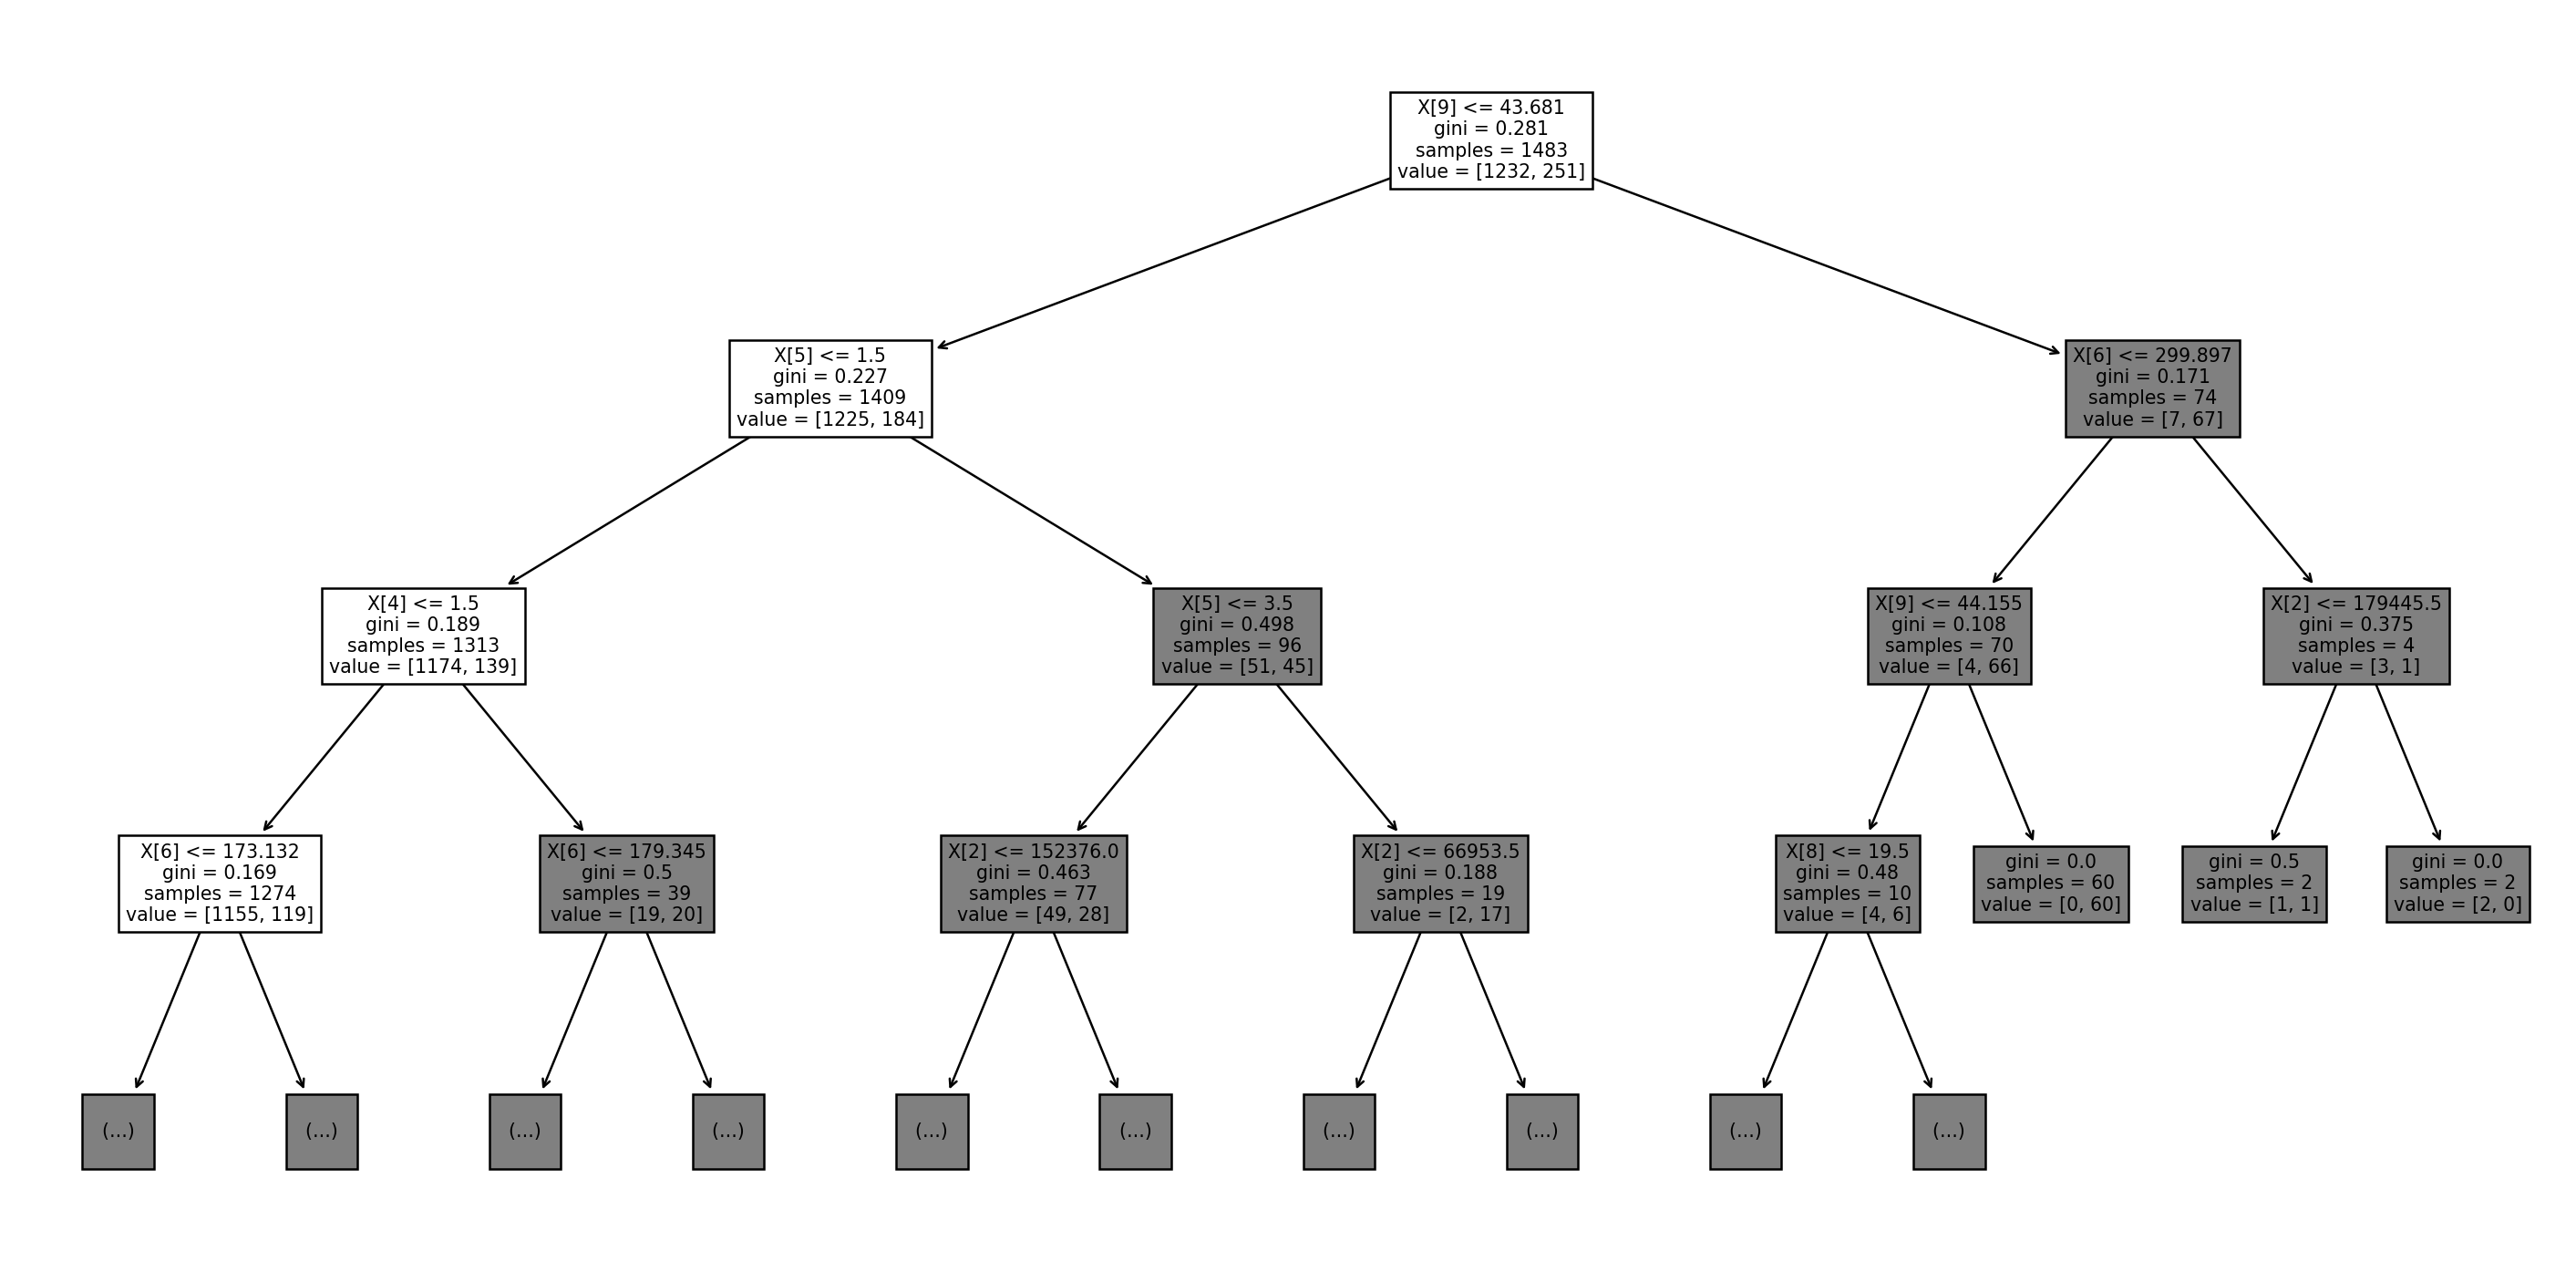

In [23]:
from sklearn.tree import plot_tree

fig=plt.figure(figsize=(20,10), dpi=180)
plot_tree(best_model, max_depth=3);